In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
#import the train and test data set
train = pd.read_csv(r'E:\All\MPS in Analytics, Northeastern University\Acads\Winter 2021\2nd Term\ALY 6040 Data Mining\Final project dataset\dataset\train.csv')
test = pd.read_csv(r'E:\All\MPS in Analytics, Northeastern University\Acads\Winter 2021\2nd Term\ALY 6040 Data Mining\Final project dataset\dataset\test.csv')

In [5]:
train.shape

(103904, 25)

In [6]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [7]:
train=train.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)
test=test.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)

In [8]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [9]:
train.shape

(103904, 22)

In [10]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [11]:
test.shape

(25976, 22)

In [12]:
# Filtering all Categorical variables
vars_categorical = list(train.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [13]:
le=LabelEncoder()
train["Gender"]=le.fit_transform(train["Gender"])
train["Customer Type"]=le.fit_transform(train['Customer Type'])
train["Type of Travel"]=le.fit_transform(train["Type of Travel"])
train["Class"]=le.fit_transform(train["Class"])
train["satisfaction"]=le.fit_transform(train["satisfaction"])

In [14]:
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [15]:
# Filtering all Categorical variables

vars_categorical = list(test.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [16]:
le=LabelEncoder()
test["Gender"]=le.fit_transform(test["Gender"])
test["Customer Type"]=le.fit_transform(test['Customer Type'])
test["Type of Travel"]=le.fit_transform(test["Type of Travel"])
test["Class"]=le.fit_transform(test["Class"])
test["satisfaction"]=le.fit_transform(test["satisfaction"])

In [17]:
test.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,1
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0
3,1,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,1


In [31]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.0
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.0
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,1.0
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.0
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,1.0


In [32]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


In [27]:
features = ['Type of Travel','Inflight wifi service','Online boarding','Seat comfort','Flight Distance',
            'Inflight entertainment','On-board service','Leg room service','Cleanliness','Checkin service', 
            'Inflight service', 'Baggage handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8534801355097013
ROC Area under Curve = 0.8493574511238298
Time taken = 1.253157138824463
              precision    recall  f1-score   support

           0    0.85955   0.88314   0.87118     14573
           1    0.84522   0.81557   0.83013     11403

    accuracy                        0.85348     25976
   macro avg    0.85239   0.84936   0.85066     25976
weighted avg    0.85326   0.85348   0.85316     25976



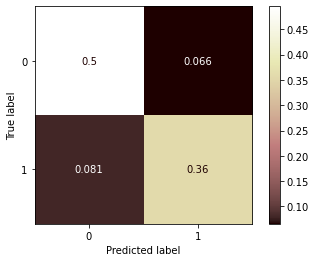

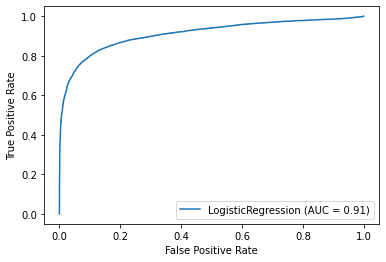

In [29]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.388300
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               103904
Model:                          Logit   Df Residuals:                   103892
Method:                           MLE   Df Model:                           11
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                  0.4325
Time:                        08:21:08   Log-Likelihood:                -40346.
converged:                       True   LL-Null:                       -71094.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0185      0.010   -104.248      0.000      -1.038      -0.999
x2             0.1405      0.